In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline

# read the data

In [50]:
#read thru this link to know more abput the data
#https://archive.ics.uci.edu/ml/datasets/Adult
#lets read the data directly from the website
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','Salary'])

In [51]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#dependent variable is whether the person earns >50k or <=50k

# split the data 

In [52]:
#split the data into train & test using a random seed. Take seed as  1 so that all get the same answer
#take all columns as IV and <=50K as Dependent variable

#before splitting we wil have to create dummy variables---
#lets do that and come back to splitting--

df1=pd.get_dummies((df.drop(["age","capital-gain","capital-loss","hours-per-week","Salary"],axis=1)),drop_first=True)
df_new=pd.concat([df,df1],axis=1)
df_new.reset_index(inplace=True,drop=True)
print df_new.columns
#not including fnlwgt & workclass n my model as they have too many categories
df2=df_new.drop(["workclass",'fnlwgt',"education","marital-status","occupation","relationship","race","sex","native-country"],axis=1)
df2.head()

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       ...
       u'native-country_ Portugal', u'native-country_ Puerto-Rico',
       u'native-country_ Scotland', u'native-country_ South',
       u'native-country_ Taiwan', u'native-country_ Thailand',
       u'native-country_ Trinadad&Tobago', u'native-country_ United-States',
       u'native-country_ Vietnam', u'native-country_ Yugoslavia'],
      dtype='object', length=111)


,age,education-num,capital-gain,capital-loss,hours-per-week,Salary,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,<=50K,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,<=50K,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,<=50K,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,<=50K,7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,<=50K,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#create the independent variables
indep=list(df2.columns)
indep.remove(indep[5])

In [54]:
#now lets start the slitting process
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[indep],df2['Salary'],test_size=0.3,random_state=1)


# hOMEWORK TASK 

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
#build a Decision tree and give the max_depth as a variable x. Keep this Code in a loop and start the
#variable from depth(x)=1 to depth x=50... 
#using this predict on the train data and also on the test data....
#keep saving the accuracy for both train and test data INTO 2 VARIABLES (LISTS/ARAYS) and for each depth (1 to 50) and finally prepare 

train_A=[]
test_A=[]
for x in range(1,51):
    cl_tree1=tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=x)
    cl_tree1=cl_tree1.fit(X_train,y_train)
    pred_train=cl_tree1.predict(X_train)
    pred_test=cl_tree1.predict(X_test)
    train_A.append(accuracy_score(y_train,pred_train))
    test_A.append(accuracy_score(y_test,pred_test))


# ALL THE BEST!!

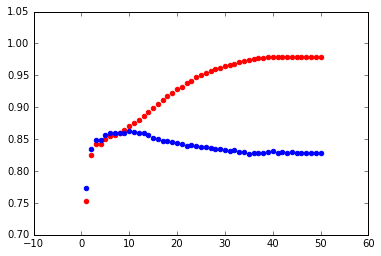

In [48]:
# 2 plots...

#plot #1-------- for training data
#x axis shud be depth (1 to 50)
#y axi shud be train data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud
#gradually increase...as depth increasees

#plot #2---- for test data
#x axis shud be depth (1 to 50)
#y axi shud be test data accuracy corresponding to depth x=1 to 50///
# the graph shud show less accuarcy at the begining when depth=less and accuracy shud 
#gradually increase for higher depth and then strat decreasing again...as depth beocmes too big..
# this will be due to OVERfittinG...

# through this Homework OVERFITTING SHUD BE CLEAR TO YOU IN DECISION TREEE.......
#U CAN DISCUSS WITHIN YOUSELVESS... 
plt.scatter(range(1,51),train_A,color="red")
plt.scatter(range(1,51),test_A,color="blue")

In [ ]:
#what does this prove----- Recall this 